<a href="https://colab.research.google.com/github/rohitdanda/DeepLearning_DataSets/blob/master/lesson1_MNIST_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import untar_data,URLs

In [0]:
data = untar_data(URLs.MNIST_SAMPLE)

In [11]:
data.ls()

[PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/testing')]

In [0]:
path_image = data/'training'

In [13]:
path_image.ls()

[PosixPath('/root/.fastai/data/mnist_png/training/8'),
 PosixPath('/root/.fastai/data/mnist_png/training/3'),
 PosixPath('/root/.fastai/data/mnist_png/training/4'),
 PosixPath('/root/.fastai/data/mnist_png/training/2'),
 PosixPath('/root/.fastai/data/mnist_png/training/6'),
 PosixPath('/root/.fastai/data/mnist_png/training/9'),
 PosixPath('/root/.fastai/data/mnist_png/training/0'),
 PosixPath('/root/.fastai/data/mnist_png/training/1'),
 PosixPath('/root/.fastai/data/mnist_png/training/5'),
 PosixPath('/root/.fastai/data/mnist_png/training/7')]

In [17]:
from fastai.vision import get_image_files
filelist = get_image_files(path_image)
filelist

[]

In [0]:
from fastai.vision import ImageDataBunch,get_transforms
data_bunch = ImageDataBunch.from_folder(data,ds_tfms=get_transforms(do_flip=False),size=28)

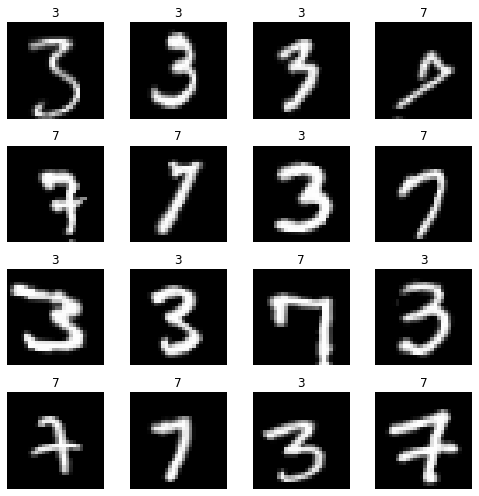

In [24]:
data_bunch.show_batch(4,figsize=(7,7))

In [25]:
from fastai.vision import cnn_learner,models
from fastai.metrics import error_rate

learner = cnn_learner(data_bunch,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [27]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [28]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.334529,0.228502,0.074092,00:22
1,0.150312,0.159355,0.048086,00:21
2,0.089709,0.066799,0.024043,00:20
3,0.085477,0.053984,0.015702,00:21


In [0]:
learner.save('stage1-mnist')

In [0]:
learner.unfreeze()

In [31]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.031210,0.004250,0.000491,00:22


In [32]:
learner.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


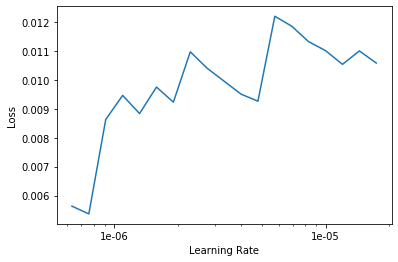

In [33]:
learner.recorder.plot()

In [34]:
learner.load('stage1-mnist')

Learner(data=ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): 

In [0]:
learner.unfreeze()

In [36]:
learner.fit_one_cycle(2,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.050066,0.030347,0.007851,00:22
1,0.031424,0.012217,0.004416,00:24
